In [1]:
#import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define variables
FAST_MA = 50
SLOW_MA = 200
STARTING_BALANCE = 10000

In [3]:
#define time period
START = datetime.datetime(2005, 1, 1)
END = datetime.datetime(2020, 1, 1)
YEARS = (END - START).days / 365.25

In [4]:
#load data into a pandas dataframe
symbol = "^GSPC"
price = yf.download(symbol, start=START, end=END)

price.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000


In [5]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

price.head()

,Open,Close
Date,,
2005-01-03,1211.920044,1202.079956
2005-01-04,1202.079956,1188.050049
2005-01-05,1188.050049,1183.739990
2005-01-06,1183.739990,1187.890015
2005-01-07,1187.890015,1186.189941


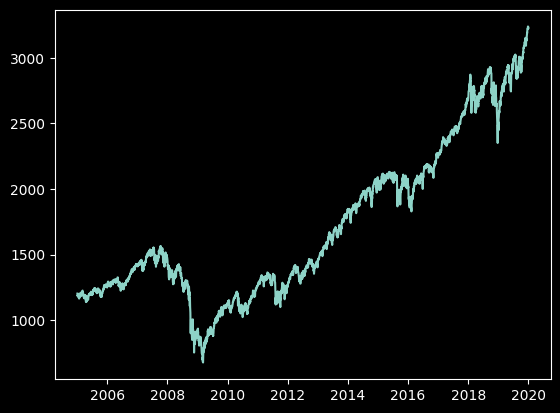

In [6]:
#plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820


In [8]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

In [9]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Date,,,,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791


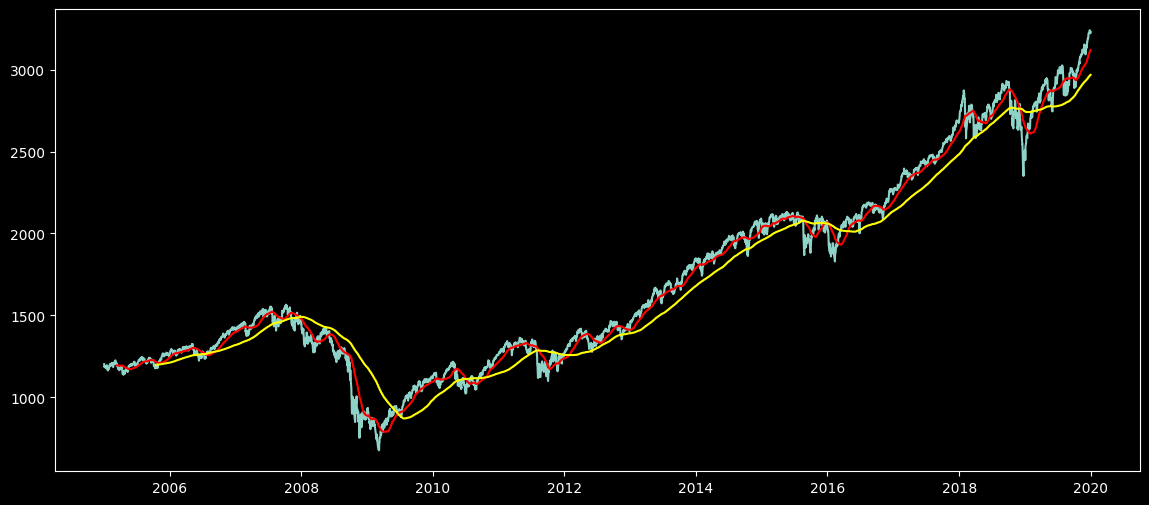

In [10]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")

plt.show()

In [11]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Date,,,,,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890,True
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840,True
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541,True
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591,True
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791,True


In [12]:
#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret
Date,,,,,,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890,True,0.999805
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840,True,1.005128
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541,True,1.000034
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591,True,0.994219
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791,True,1.002946


In [13]:
#calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890,True,0.999805,27860.059363
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840,True,1.005128,28002.930391
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541,True,1.000034,28003.882063
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591,True,0.994219,27841.996593
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791,True,1.002946,27924.019718


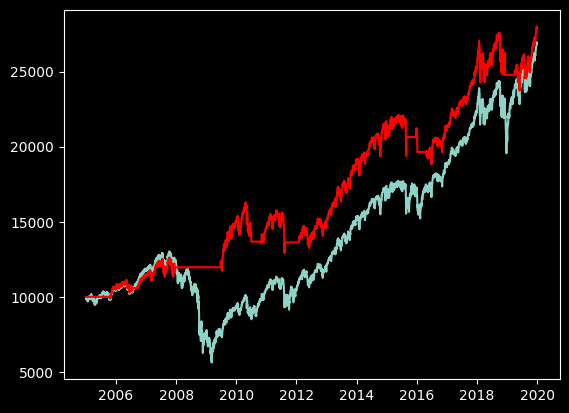

In [14]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")

plt.show()

In [15]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-20.51


In [16]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 171.94%
Benchmark CAGR: 6.9
Benchmark DD: -56.78%

System Total return: 179.24%
System CAGR: 7.09
System DD: -20.51%
System Time in the Market: 72.53%


In [17]:
def backtest(price, period_fast, period_slow):
    #calculate moving averages
    price['Fast_MA'] = price.Close.rolling(window = period_fast).mean()
    price['Slow_MA'] = price.Close.rolling(window = period_slow).mean()

    #Hold a position for every day the close is above the MA
    price['Long'] = price.Fast_MA > price.Slow_MA
    
    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    
    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100
    
    return cagr_system

In [18]:
periods_slow = []
periods_fast = []
periods_slow.extend(range(140, 255, 5))
periods_fast.extend(range(5, 105, 5))

cagr = {}

results_full = []

for slow in periods_slow:
    results_fast = []
    for fast in periods_fast:
        result = backtest(price, fast, slow)
        results_fast.append(result)
    results_full.append(results_fast)

<Axes: >

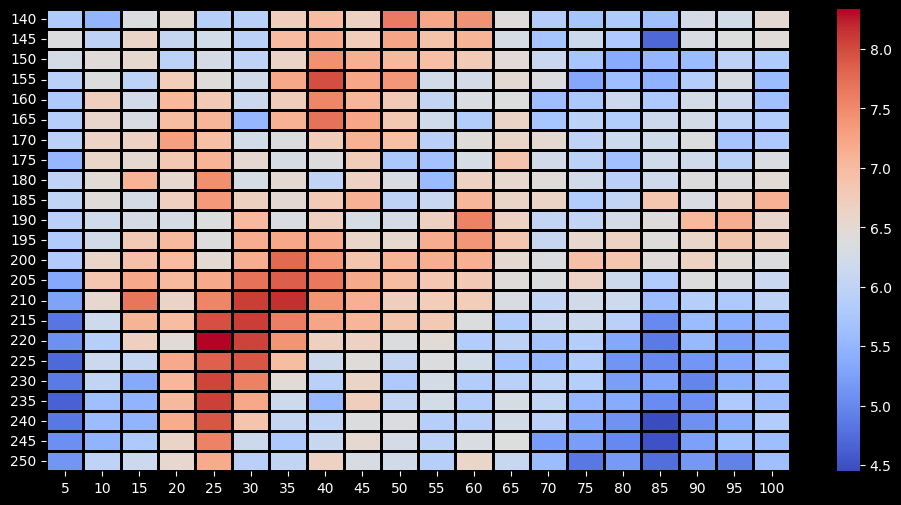

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_full,
            cmap="coolwarm",
            xticklabels=periods_fast,
            yticklabels=periods_slow,
            linewidth=1,
            linecolor="black"
           )

In [20]:
max_cagr = max(list(map(max, results_full)))

max_cagr

8.33340398537976

In [21]:
for i, x in enumerate(results_full):
    if max_cagr in x:
        s = results_full[i].index(max_cagr)
        f = i

print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

Fast MA: 25
Slow MA: 220
CAGR: 8.33%
